In [1]:
import matplotlib.pyplot as plt
import re
from mxnet.contrib import text
import pickle
from mxnet import nd
from MulticoreTSNE import MulticoreTSNE as TSNE
import numpy as np

In [2]:
train_data,train_label = pickle.load(open('./train','rb'))
test_data,test_label = pickle.load(open('./test','rb'))
data_vocab = pickle.load(open('./data_vocab','rb'))

In [3]:
def review_to_wordlist(review):
    string = review.lower()
    string = re.findall(r'(?u)\b\w\w+\b',string)
    return string

In [4]:
def norm_vecs_by_row(x):
    return x / nd.sqrt(nd.sum(x * x, axis=1)).reshape((-1,1))

def get_knn(token_embedding, k, word):
    word_vec = token_embedding.get_vecs_by_tokens([word]).reshape((-1, 1))
    vocab_vecs = norm_vecs_by_row(token_embedding.idx_to_vec)
    dot_prod = nd.dot(vocab_vecs, word_vec)
    indices = nd.topk(dot_prod.reshape((len(token_embedding), )), k=k+2,
                      ret_typ='indices')
    indices = [int(i.asscalar()) for i in indices]
    # 除去未知词符号和输入词。
    return token_embedding.to_tokens(indices[2:])

In [5]:
def data_len_vew(data,maxlen=[10000,5000,2000]):
    lendic = {}
    for d in data:
        n = len(d)
        if n not in lendic:
            lendic[n] = 0
        lendic[n] +=1
        if n ==0:
            print(d)
    
    x = []
    y = []
    for k in lendic:
        x.append(k)
        y.append(lendic[k])
        

    for xl in maxlen:
        plt.figure(figsize=(9,6),dpi=100)
        plt.bar(x,y)
        plt.xlim(0,xl)
        plt.xlabel('world num')
        plt.ylabel('data num')
        plt.show()

In [6]:
def label_vew(label):
    label_dic ={}
    for l in label:
        if l not in label_dic:
            label_dic[l] = 0
        label_dic[l] +=1
    char_to_idx = dict([(char, i) for i, char in enumerate(label_dic.keys())])
    y = []
    yk = []
    x= []
    for yy in label_dic.keys():
        y.append(char_to_idx[yy])
        yk.append(yy)
        x.append(label_dic[yy])
    plt.figure(figsize=(9,6),dpi=100)
    plt.barh(y,x)
    plt.yticks(range(20),yk)
    plt.show()

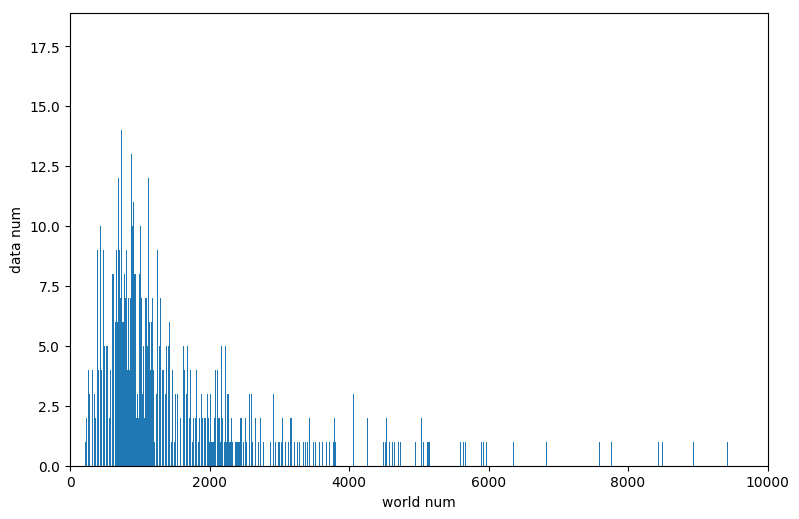

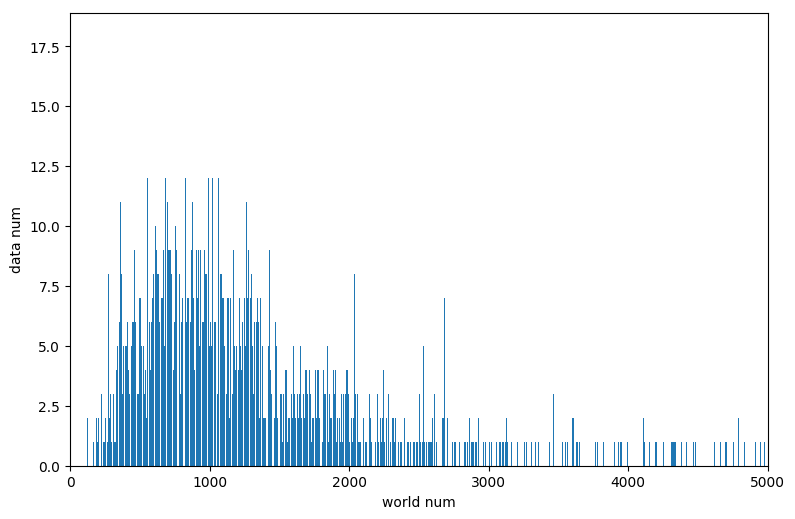

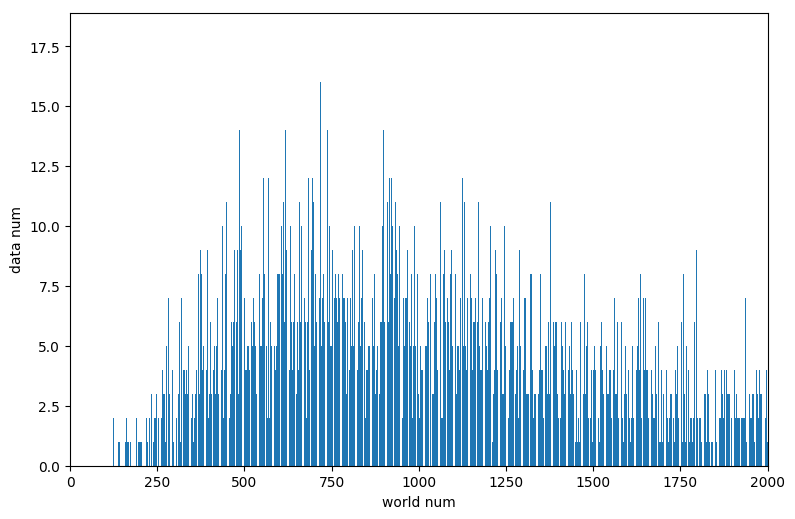

In [7]:
data_len_vew(train_data)

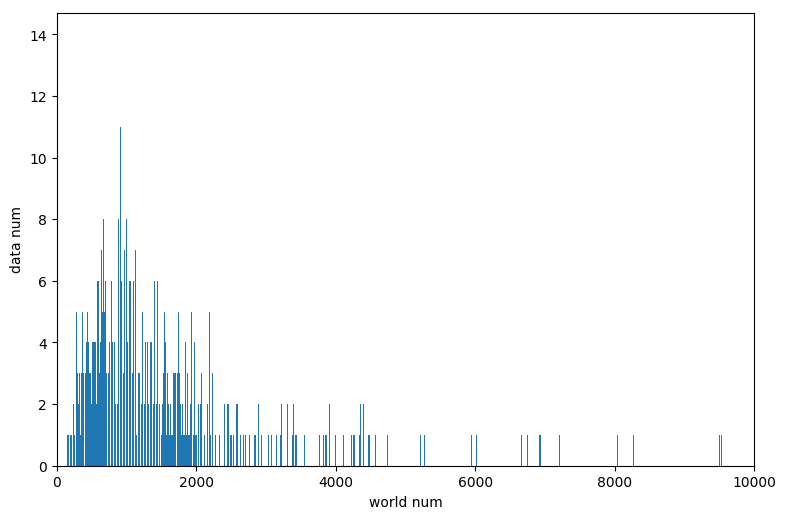

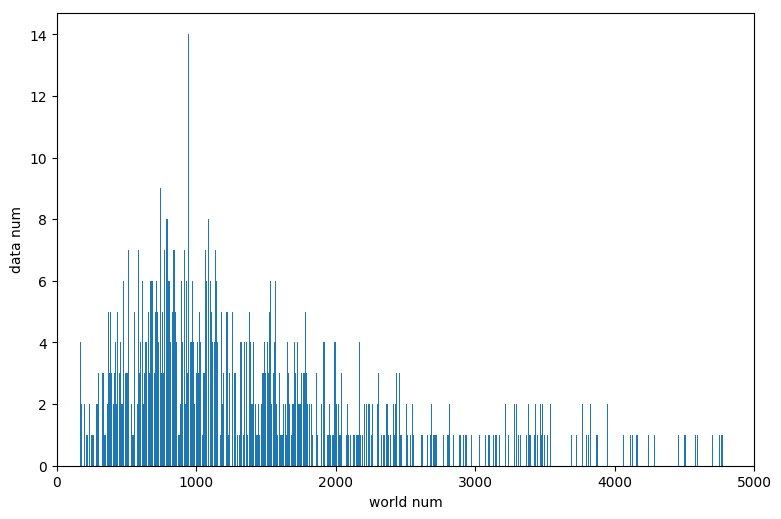

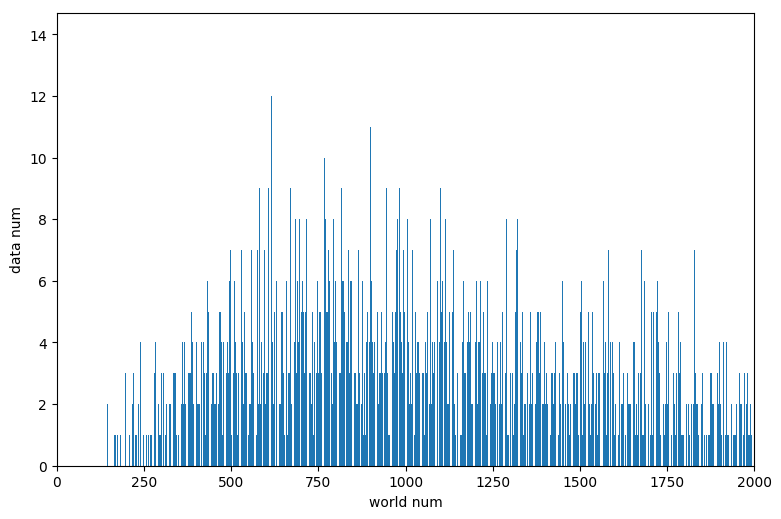

In [8]:
data_len_vew(test_data)

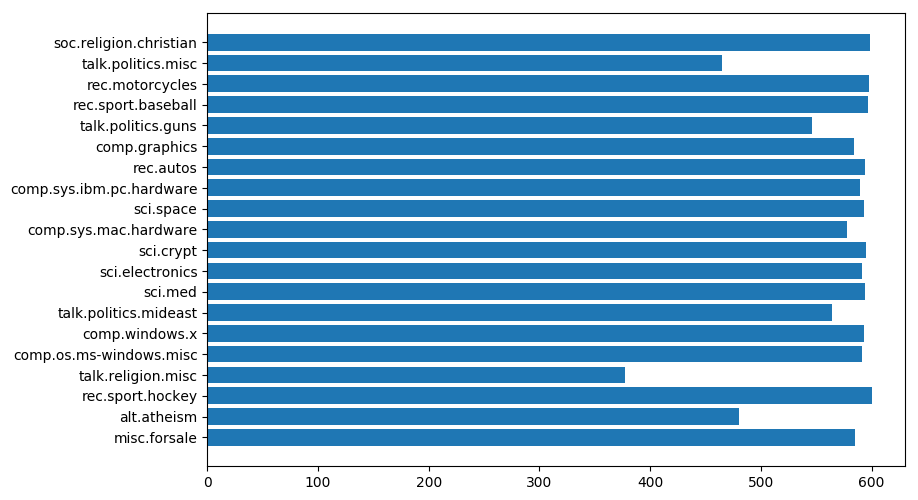

In [9]:
label_vew(train_label)

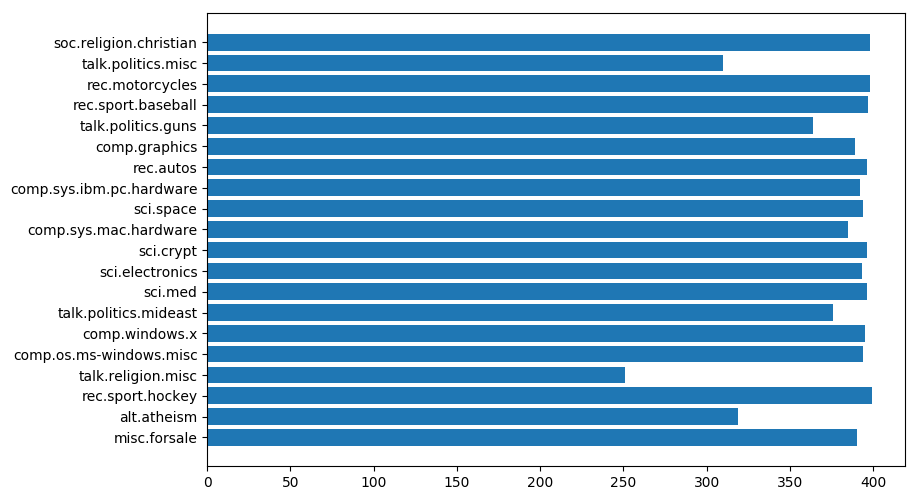

In [10]:
label_vew(test_label)

In [11]:
td = []
for d in train_data:
    rad = review_to_wordlist(d)
    td.append(rad)
tsd = []
for d in test_data:
    rad = review_to_wordlist(d)
    tsd.append(rad)

In [12]:
print(train_data[0])
print('\n---------------------------分割线-------------------------------\n')
s = ' '.join(td[0])
print(s)

From: martimer@bigwpi.WPI.EDU (jonathan Sawitsky)
Subject: Re: What's wrong with this picture?
Organization: Worcester Polytechnic Institute
Lines: 25
NNTP-Posting-Host: bigwpi.wpi.edu

In article <1993Apr5.203212.28284@erenj.com> srfergu@rufus.erenj.com (Scott Ferguson) writes:
>In article <1993Apr3.152922.12050@iscsvax.uni.edu>, harter5255@iscsvax.uni.edu writes:
>|> Fellow netters,
>|> 
>|> Is anybody awake out there?  When someone posted a message telling people to
>|> stop posting computer ads to the misc.forsale group, he got about thirty
>|> response here, not to mention the rash of E-Mail I'm sure he received.  Yet,
>|> another person posts a message with the subject line "blow me" and an even 
>|> worse text, and only 3 or 4 people have the guts to say anything.  The majority
>
>Not to mention the thread about selling someone's wife. I am a guy, therefore
>not overly bummed by it, but a little common sense would dictate that this
>is offensive to many women, and not really nec

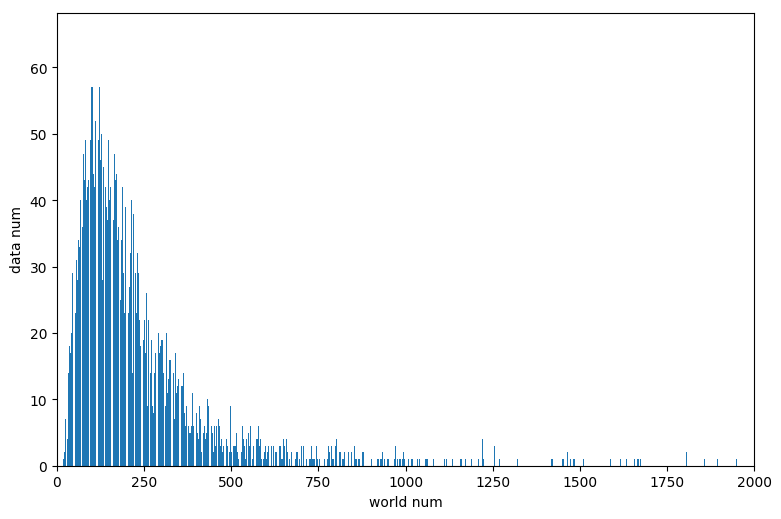

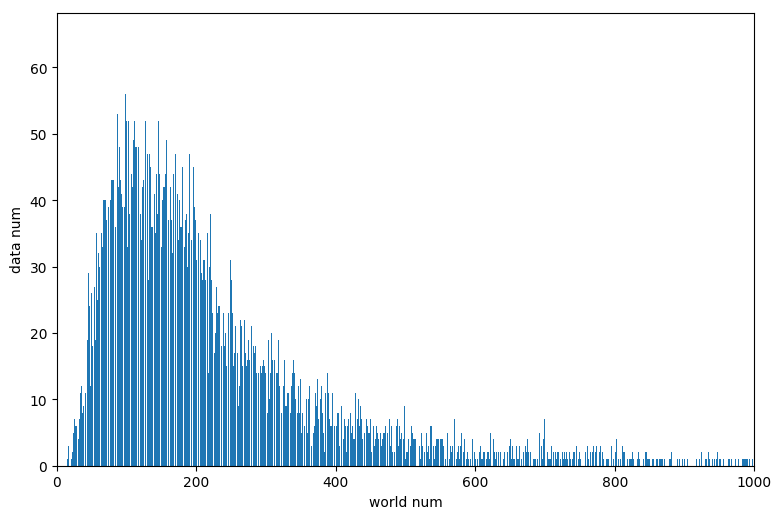

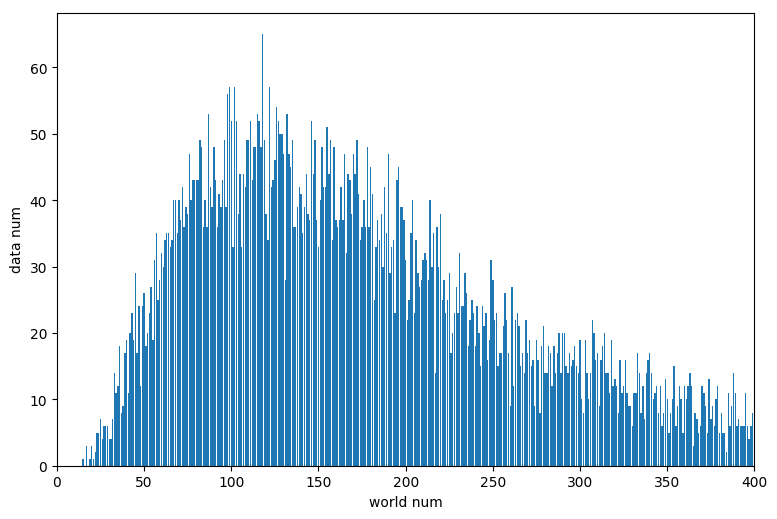

In [13]:
data_len_vew(td,maxlen=[2000,1000,400])

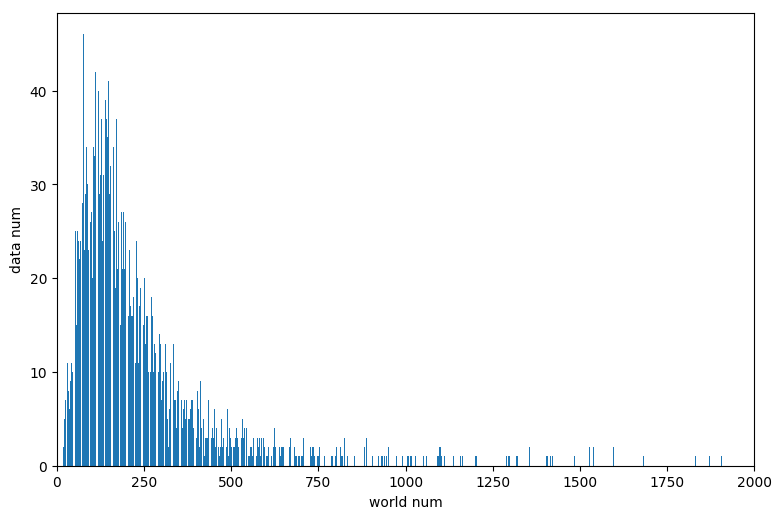

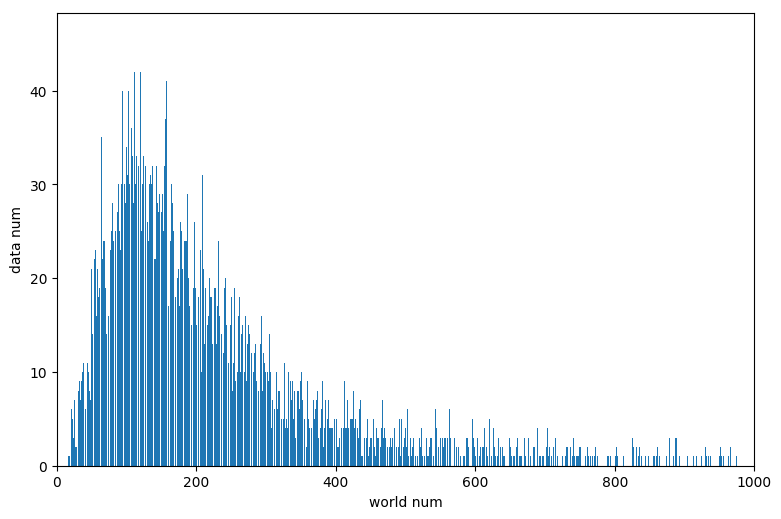

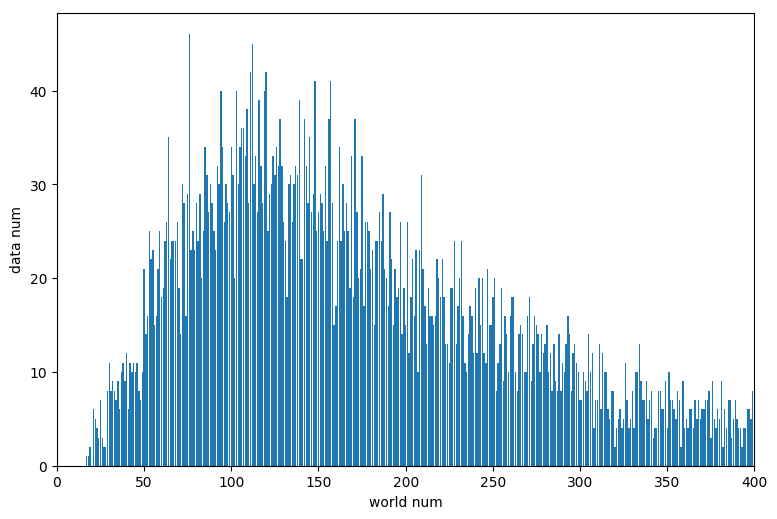

In [14]:
data_len_vew(tsd,maxlen=[2000,1000,400])

In [15]:
embedding = text.embedding.create('fasttext', pretrained_file_name='wiki.simple.vec', vocabulary=data_vocab)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/mxnet/contrib/text/embedding.py:278: UserWarning: At line 1 of the pre-trained text embedding file: token 111051 with 1-dimensional vector [300.0] is likely a header and is skipped.
  'skipped.' % (line_num, token, elems))


In [16]:
xsc_school = get_knn(embedding,10,'school')
xsc_milk = get_knn(embedding,10,'milk')
xsc_phone = get_knn(embedding,10,'phone')

vecc = []
textlist = []
for n in xsc_school:
    vecc.append(embedding.get_vecs_by_tokens(n).asnumpy())
    textlist.append(n)
for n in xsc_milk:
    vecc.append(embedding.get_vecs_by_tokens(n).asnumpy())
    textlist.append(n)
for n in xsc_phone:
    vecc.append(embedding.get_vecs_by_tokens(n).asnumpy())
    textlist.append(n)

In [17]:
import numpy as np
vecc = np.array(vecc)

In [18]:
tsne = TSNE(n_jobs=-1)
Y = tsne.fit_transform(vecc)

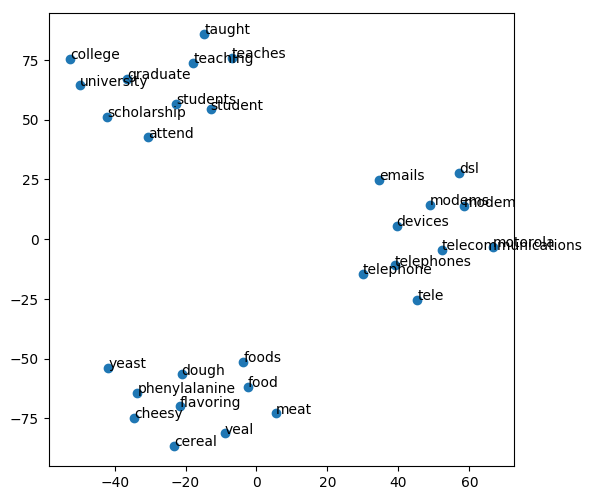

In [19]:
plt.figure(figsize=(6,6),dpi=100) 
plt.scatter(Y[:,0],Y[:,1])
for i in range(len(Y)):
    x=Y[i][0]
    y=Y[i][1]
    plt.text(x+0.01, y+0.01,textlist[i])
plt.show()

In [ ]:
embedding